L'objectif de ce notebook est d'entrainer une IA pour faire de la prédiction sur nos données. Dans notre cas les attaques terroristes.

In [1]:
# Imports pour le train et le test
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Imports pour le modèle



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Charger le fichier CSV
data = pd.read_csv("Trait2.csv", sep=",",low_memory=False)

# Remplacer les valeurs manquantes
data.fillna(0, inplace=True)

# Sélectionner les colonnes pour l'entrée (X) et la sortie (y)
colonnes_X = ['iyear', 'imonth', 'iday', 'extended', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'gname', 'nperps', 'claimed', 'weaptype1_txt', 'weapsubtype1_txt']
colonnes_y = ['nkill', 'nwound']

# Convertir les colonnes catégorielles en valeurs numériques avec le label encoding
data_X = data[colonnes_X].copy()
data_y = data[colonnes_y]

for col in data_X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_X[col] = le.fit_transform(data_X[col].astype(str))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

# Entraîner le modèle de forêt aléatoire
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)


Mean Squared Error: 1177.6357235207927
Mean Absolute Error: 9.743917190535296
R-squared: 0.1353372496968882
Root Mean Squared Error: 34.31669744484152
Mean Absolute Percentage Error: nkill     inf
nwound    inf
dtype: float64


c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 1177.6357235207927
Mean Absolute Error: 9.743917190535296
R-squared: 0.1353372496968882
Root Mean Squared Error: 34.31669744484152
Mean Absolute Percentage Error: nkill     inf
nwound    inf
dtype: float64


c:\Users\diasa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\diasa\AppData\Local\Temp\ipykernel_20324\1877447671.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


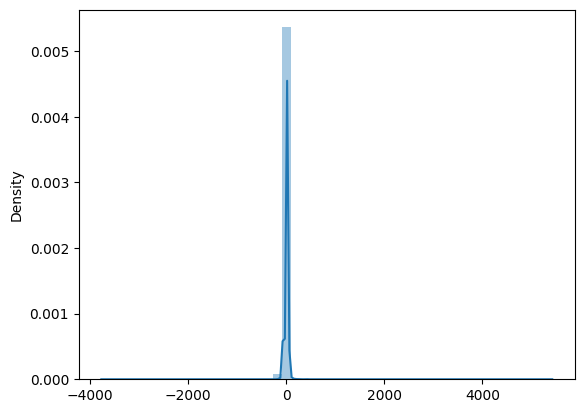

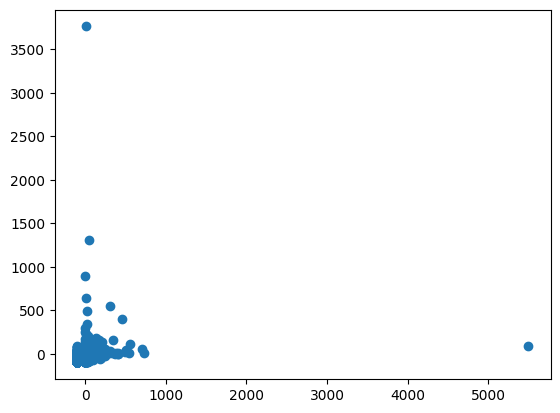

C:\Users\diasa\AppData\Local\Temp\ipykernel_20324\1877447671.py:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


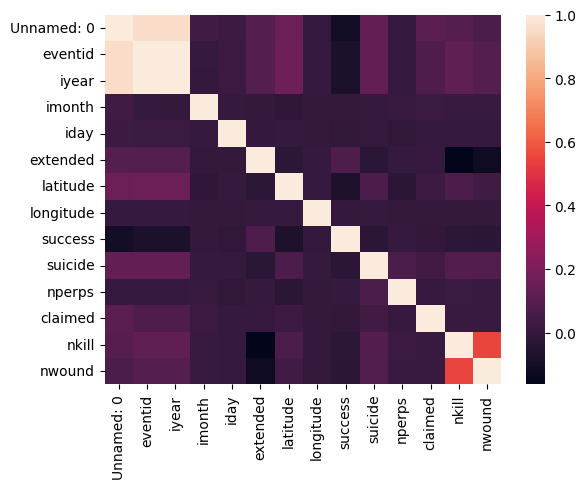

Accuracy: 13.533724969688821 %


In [3]:
# Test et graphs.
# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Test et graphs.
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique de distribution des erreurs
sns.distplot(y_test - y_pred)
plt.show()

# Graphique de dispersion des erreurs
plt.scatter(y_test, y_pred)
plt.show()
#heatmap
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Calculer la précision du modèle en pourcentage
accuracy = rf.score(X_test, y_test) * 100
print("Accuracy:", accuracy, "%")
